<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/RotationMatrix_3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Rotation Matrix
</h1></b>

Dr. Bingsen Wang

5/12/2025
</center>

#Python Code

In [10]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-extra is already the newest version (2021.20220204-1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


0
0
50
100
150
200
250
300
350
400
450
0


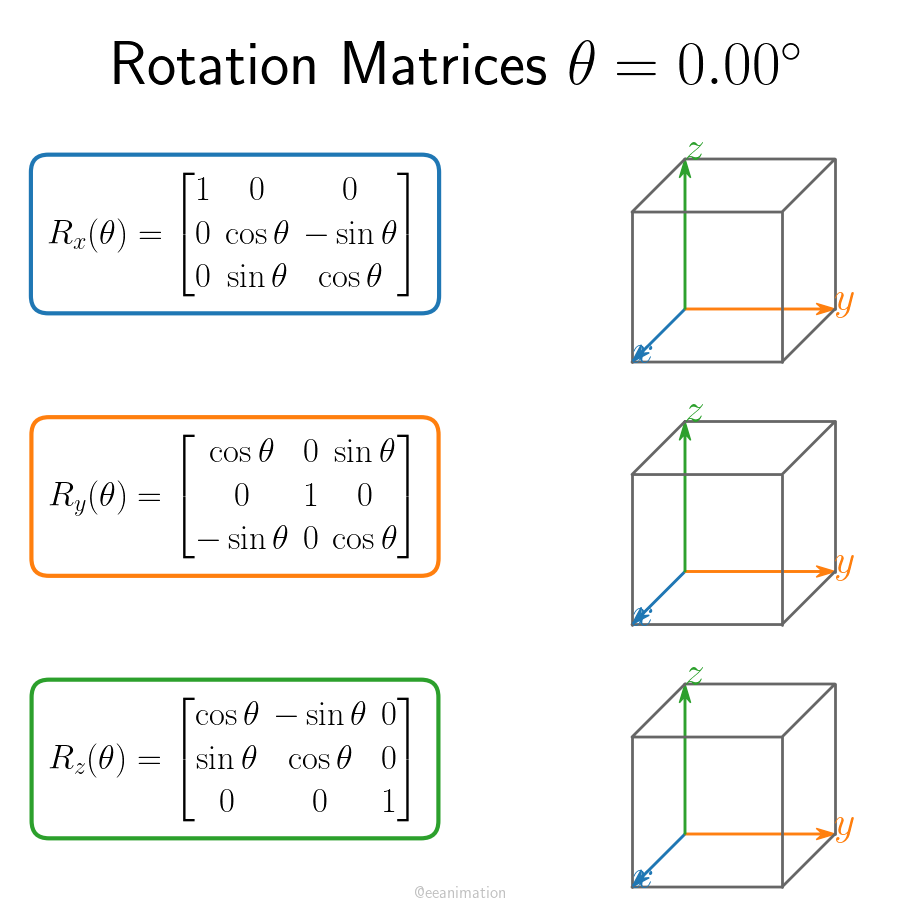

In [135]:
from matplotlib import pyplot,animation,cm,patches
import numpy as np
pyplot.rc('text', usetex=True)
pyplot.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def ct32(xyz,xy=[0,0]):
  return np.array([xyz[1]-xyz[0]*np.sin(np.pi/4)/2+xy[0],xyz[2]-xyz[0]*np.cos(np.pi/4)/2+xy[1]])
def rx(xyz,t):
  return np.array([[1,0,0],[0,np.cos(t),-np.sin(t)],[0,np.sin(t),np.cos(t)]])@xyz
def ry(xyz,t):
  return np.array([[np.cos(t),0,np.sin(t)],[0,1,0],[-np.sin(t),0,np.cos(t)]])@xyz
def rz(xyz,t):
  return np.array([[np.cos(t),-np.sin(t),0],[np.sin(t),np.cos(t),0],[0,0,1]])@xyz
def draw_cube(ax,pts,xy=[0,0]):
  pts2d=[]
  for p in pts:  pts2d.append(ct32(p,xy))
  ax.plot(*np.stack(pts2d[1:4],axis=1),c='.4',lw=2,solid_capstyle='round')
  ax.plot(*np.stack(pts2d[4:]+[pts2d[4]],axis=1),c='.4',lw=2,solid_capstyle='round')
  [ax.plot(*np.stack([pts2d[1+k],pts2d[5+k]],axis=1),c='.4',lw=2,solid_capstyle='round') for k in range(3)]
  ax.add_patch(patches.FancyArrow(*pts2d[0],*ct32(pts[1]),width=.004,length_includes_head=True,head_length=.05,
                                   head_width=.03,overhang=.3,color=cl[0]))
  [ax.add_patch(patches.FancyArrow(*pts2d[0],*ct32(pts[k+3]),width=.004,length_includes_head=True,head_length=.05,
                                   head_width=.03,overhang=.3,color=cl[k+1])) for k in range(2)]
  [ax.text(*[pts2d[1],pts2d[3],pts2d[4]][k],['$x$','$y$','$z$'][k],size=30,c=cl[k]) for k in range(3)]
  return

Nf=480;t=np.linspace(0,2*np.pi,Nf)
xy0=(-.6,.6);xy1=(.6,.4)
a=.4; x,y,z=[a,0,0],[0,a,0],[0,0,a]
pts=[np.array([0,0,0]),np.array(x),np.array([a,a,0]),np.array(y),
     np.array(z),np.array([a,0,a]),np.array([a,a,a]),np.array([0,a,a])]
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.2]);ax.axis('off')
ax1 = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.2],fc='none')
txt=ax.text(0,1,"",size=45,ha='center')
R_xyz=[r'$R_x(\theta)=\begin{bmatrix}1&0&0 \\ 0&\cos\theta &-\sin\theta \\ 0&\sin\theta &\cos\theta \end{bmatrix}$',
       r'$R_y(\theta)=\begin{bmatrix}\cos\theta &0&\sin\theta \\0&1&0 \\  -\sin\theta &0&\cos\theta \end{bmatrix}$',
       r'$R_z(\theta)=\begin{bmatrix}\cos\theta &-\sin\theta &0 \\ \sin\theta &\cos\theta &0 \\ 0&0&1 \end{bmatrix}$']
[ax.text(xy0[0],xy0[1]-k*.7,R_xyz[k],size=25,ha='center',va='center',multialignment='left',
        bbox=dict(boxstyle='round',pad=.5,facecolor='none',edgecolor=cl[k],lw=3)) for k in range(3)]

def animate(i):
  if i%50==0: print(i)
  xlim=ax1.get_xlim();ylim=ax1.get_ylim();ax1.cla();ax1.set_xlim(xlim);ax1.set_ylim(ylim);ax1.axis('off')
  pts_rx=[rx(p,t[i]) for p in pts]
  pts_ry=[ry(p,t[i]) for p in pts]
  pts_rz=[rz(p,t[i]) for p in pts]
  [draw_cube(ax1,[pts_rx,pts_ry,pts_rz][k],xy=(xy1[0],xy1[1]-.7*k)) for k in range(3)]
  txt.set_text(rf'Rotation Matrices $\theta={t[i]/np.pi*180:.2f}^\circ$')
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("RotationMatrix.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)